<a href="https://colab.research.google.com/github/raja-singh-7389/Covid-19-Time_Series-_-Analysis/blob/main/Covid_19_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd


data = pd.read_csv('/content/covid_19_clean_complete.csv')

In [14]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [16]:
# converting 'Date' column to datetime format

data['Date'] = pd.to_datetime(data['Date'])

In [17]:
# Aggregating data by date
global_data = data.groupby('Date').agg({'Confirmed' : 'sum', 'Deaths': 'sum', 'Recovered': 'sum'}).reset_index()


In [23]:

import plotly.express as px
# Visualizing global trends :
fig1 = px.line(global_data, x='Date', y=['Confirmed', 'Deaths', 'Recovered'], title='Global COVID-19 Infection and Recovery Rates', labels={'values': 'Rate(%)', 'Date' : 'Date'})
fig1.show()

In [24]:
# calculating rate of infection and recovery
global_data['Infection_Rate'] = global_data['Confirmed'].pct_change() * 100
global_data['Recovery_Rate'] = global_data['Recovered'].pct_change() * 100

In [25]:
# visualizing the infection and recovery  rates
fig2 = px.line(global_data, x='Date', y=['Infection_Rate', 'Recovery_Rate'], title='Global COVID-19 Infection and Recovery Rates', labels={'values': 'Rate(%)', 'Date' : 'Date'})
fig2.show()

In [29]:
# Doing some Time series Analysis but first we need to initialize and fit the model using Prophet

from prophet import Prophet

# preparing the data
prophet_data = global_data[['Date', 'Confirmed']].rename(columns={'Date': 'ds', 'Confirmed': 'y'})

In [27]:
!pip install prophet

In [30]:
# Prophet library - The fbprophet library, now called Prophet (since it’s been rebranded and maintained by Meta (formerly Facebook)), is a powerful tool used for time series forecasting.
# It’s designed to handle a variety of time series data, especially when you have daily, weekly, or yearly patterns, and it works well even with missing data or outliers.

model = Prophet(daily_seasonality=True)
model.fit(prophet_data)



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwie8t6pe/wuf0onq9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwie8t6pe/k36lbz3l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43548', 'data', 'file=/tmp/tmpwie8t6pe/wuf0onq9.json', 'init=/tmp/tmpwie8t6pe/k36lbz3l.json', 'output', 'file=/tmp/tmpwie8t6pe/prophet_modeldlanim7z/prophet_model-20250119111056.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [31]:
# making prediction for next 7 days

future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)








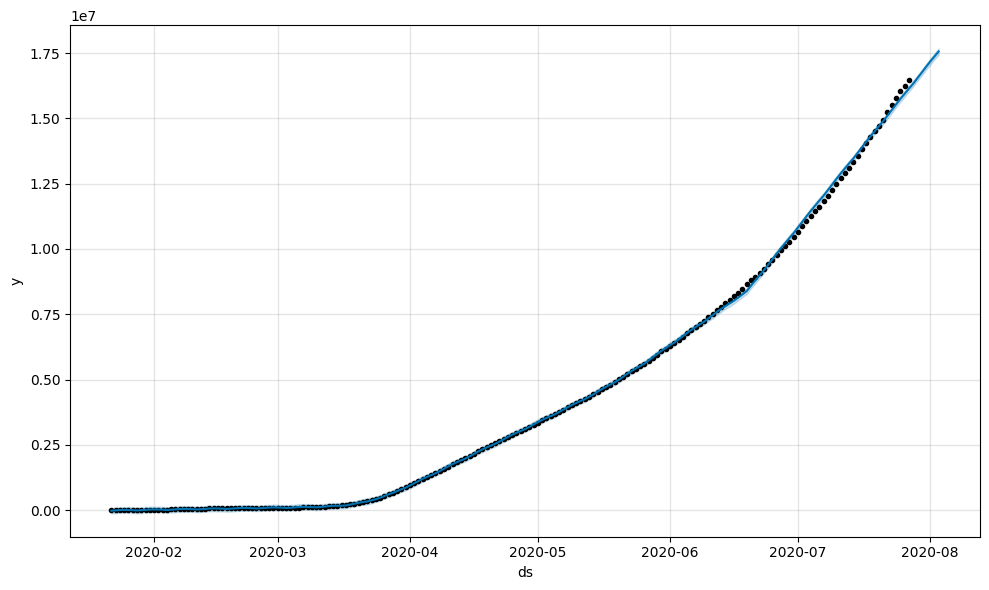

In [32]:
# visualize the forecast
fig3 = model.plot(forecast)
fig3.show()

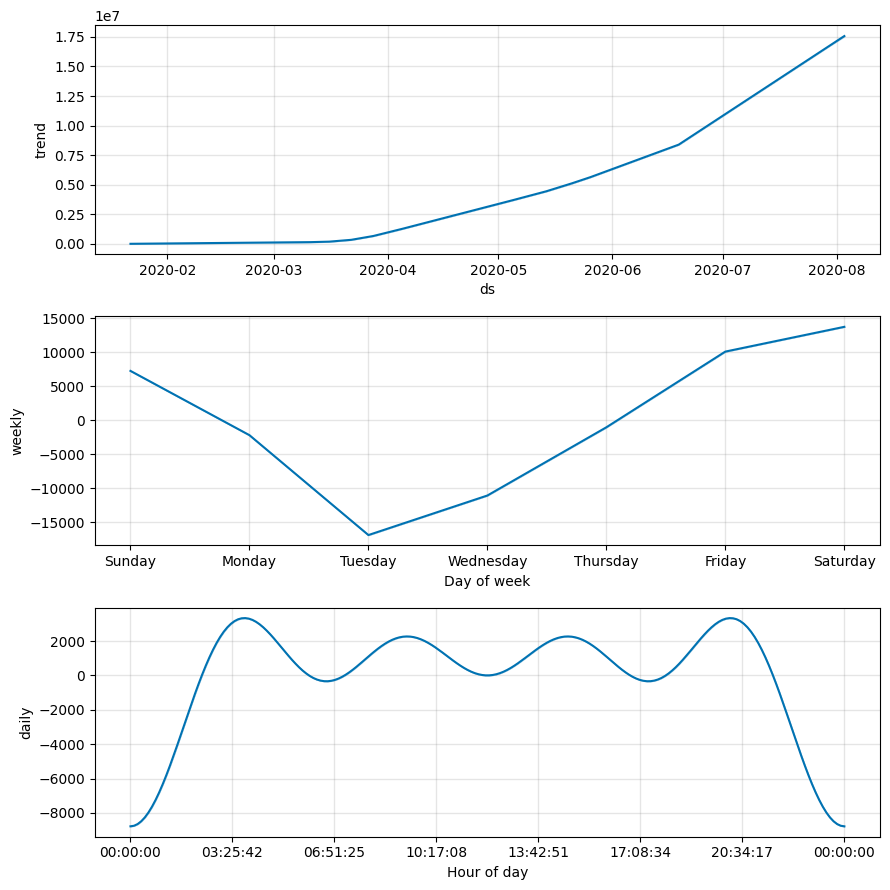

In [33]:
# visualize the forecast components such as trend, seasonality,etc.
fig4 = model.plot_components(forecast)
fig4.show()
